# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There are 4 datasets listed in the link; however only three datasets were provided in the zip file. The provided datasets are as follows: "bank-additional" (CSV), "bank-additional-full" (CSV), and "bank-additional-names" (Text Doc). According to the UCI Machine Learning repository link, a fourth dataset is missing: "bank.csv" 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
import csv
import time

from sklearn import set_config, metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, r2_score, recall_score, precision_score, precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

set_config(display="diagram")

In [2]:
df = pd.read_csv('Data/bank-additional.csv', sep = ';')
df_full = pd.read_csv('Data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_full.rename(columns = {'y':'deposit'}, inplace = True)

From here we decide to use the 'bank-additional-full.csv' file for data analysis

In [6]:
dff = df_full
df_full.shape

(41188, 21)

In [7]:
dff.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
dff['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [9]:
dff.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4894,30,management,single,university.degree,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
11136,36,admin.,married,university.degree,no,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
35502,34,admin.,single,university.degree,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
8420,60,retired,single,high.school,no,no,no,telephone,jun,tue,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
29966,57,self-employed,married,basic.4y,no,yes,no,cellular,apr,mon,...,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
25854,31,blue-collar,single,high.school,no,no,no,telephone,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
34689,22,technician,single,professional.course,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
16772,29,technician,single,high.school,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21116,38,admin.,divorced,university.degree,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
13923,54,blue-collar,divorced,high.school,unknown,no,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [10]:
dff.shape

(41188, 21)

In [11]:
dff.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Select the columns to use:

In [12]:
dfs = dff[['age','job','marital','education','default','housing','loan','contact','deposit']]
dfs.head(5)

,age,job,marital,education,default,housing,loan,contact,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,no
1,57,services,married,high.school,unknown,no,no,telephone,no
2,37,services,married,high.school,no,yes,no,telephone,no
3,40,admin.,married,basic.6y,no,no,no,telephone,no
4,56,services,married,high.school,no,no,yes,telephone,no


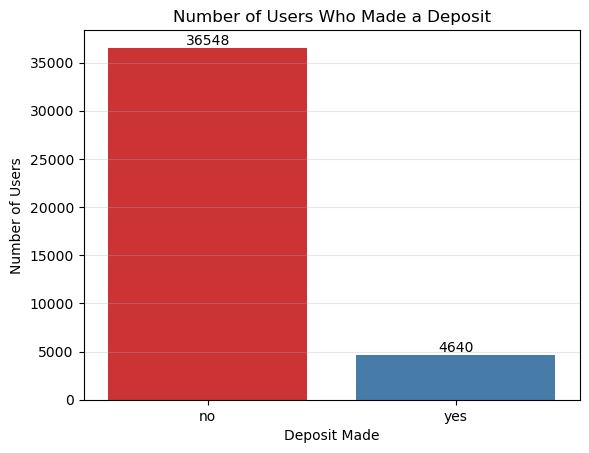

In [13]:
plt1 = sns.countplot(data=dfs, x='deposit', palette='Set1')

for container in plt1.containers:
    plt1.bar_label(container, fmt='%d')

plt.title('Number of Users Who Made a Deposit')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

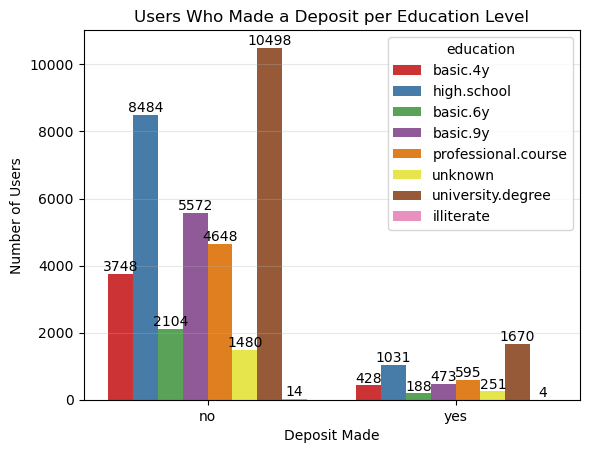

In [14]:
plt2 = sns.countplot(data=dfs, x='deposit', hue = 'education', palette='Set1')

for container in plt2.containers:
    plt2.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit per Education Level')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

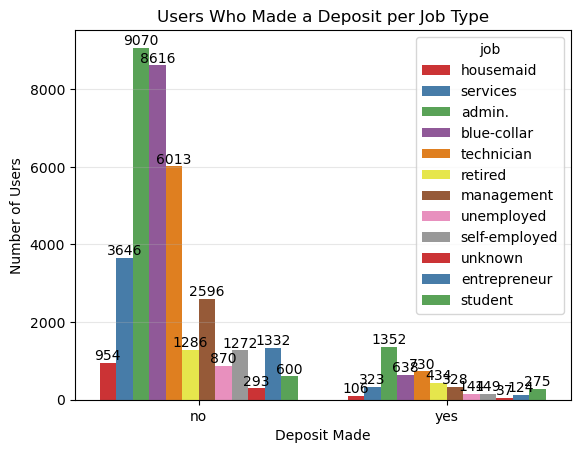

In [15]:
plt3 = sns.countplot(data=dfs, x='deposit', hue = 'job', palette='Set1')

for container in plt3.containers:
    plt3.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit per Job Type')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

In [16]:
dfs_yes = dfs[dfs['deposit']== 'yes']
dfs_no = dfs[dfs['deposit']== 'no']

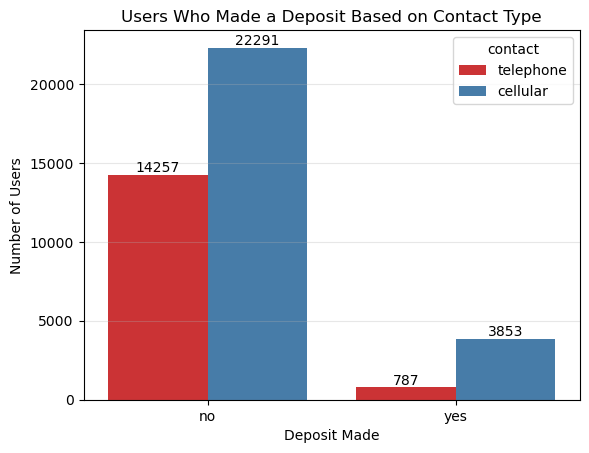

In [17]:
plt4 = sns.countplot(data=dfs, x='deposit', hue = 'contact', palette='Set1')

for container in plt4.containers:
    plt4.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit Based on Contact Type')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

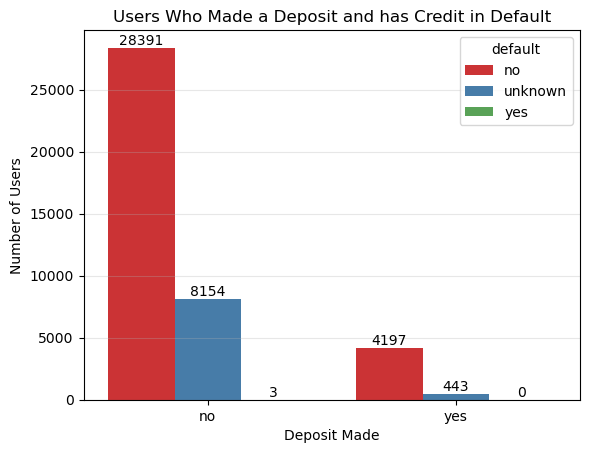

In [18]:
plt5 = sns.countplot(data=dfs, x='deposit', hue = 'default', palette='Set1')

for container in plt5.containers:
    plt5.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit and has Credit in Default')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

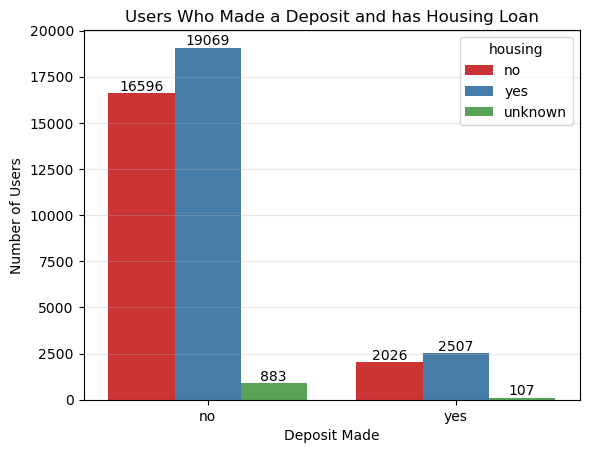

In [19]:
plt6 = sns.countplot(data=dfs, x='deposit', hue = 'housing', palette='Set1')

for container in plt6.containers:
    plt6.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit and has Housing Loan')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

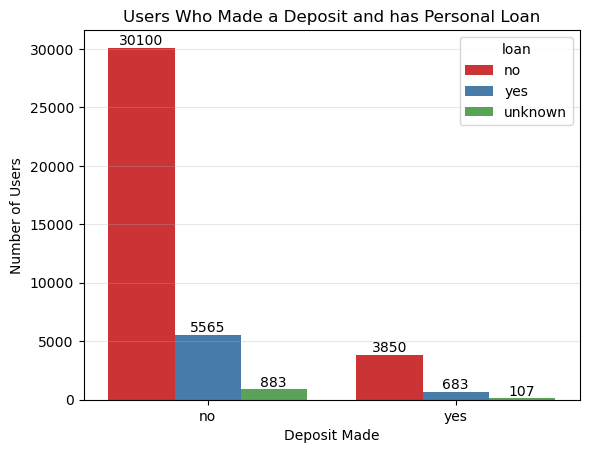

In [20]:
plt7 = sns.countplot(data=dfs, x='deposit', hue = 'loan', palette='Set1')

for container in plt7.containers:
    plt7.bar_label(container, fmt='%d')

plt.title('Users Who Made a Deposit and has Personal Loan')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

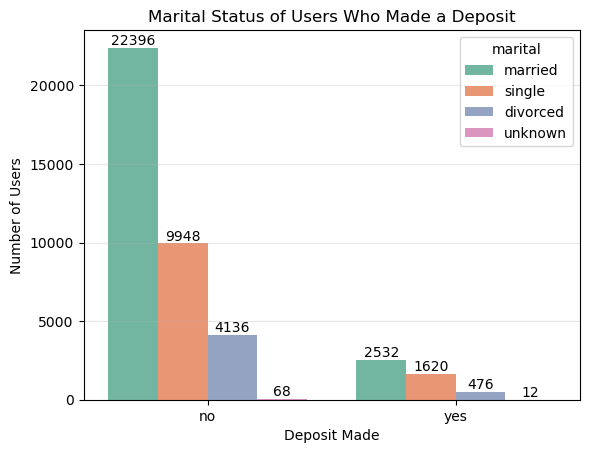

In [21]:
plt8 = sns.countplot(data=dfs, x='deposit', hue = 'marital', palette='Set2')

for container in plt8.containers:
    plt8.bar_label(container, fmt='%d')

plt.title('Marital Status of Users Who Made a Deposit')
plt.xlabel('Deposit Made')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=.3)
plt.show()

In [22]:
#le = LabelEncoder()
#dfs1 = dfs
#dfs1.job = le.fit_transform(dfs1.job)
#dfs1.marital = le.fit_transform(dfs1.marital)
#dfs1.education = le.fit_transform(dfs1.education)
#dfs1.default = le.fit_transform(dfs1.default)
#dfs1.housing = le.fit_transform(dfs1.housing)
#dfs1.loan = le.fit_transform(dfs1.loan)
#dfs1.contact = le.fit_transform(dfs1.contact)
#dfs1.deposit = le.fit_transform(dfs1.deposit)


In [23]:
#hm = dfs1.corr(numeric_only = True)
#plt.figure(figsize=(10, 10))
#sns.heatmap(dfs.corr(), annot=True)
#plt.title('Correlation Matrix of Features 1-7 & Deposit')

C:\Users\marcu\AppData\Local\Temp\ipykernel_98424\2460000170.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Matrix of the Numerical Features')

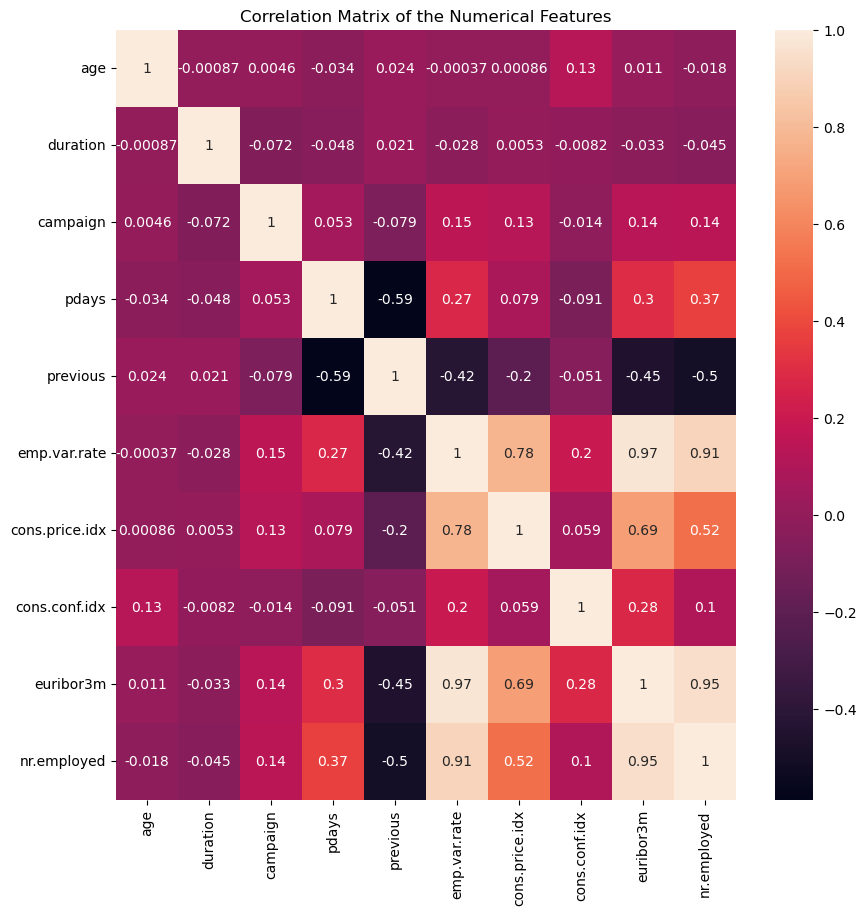

In [24]:
hm2 = dff.corr(numeric_only = True)
plt.figure(figsize=(10, 10))
sns.heatmap(dff.corr(), annot=True)
plt.title('Correlation Matrix of the Numerical Features')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

From a business objective, the task of this Machine Learning project is to determine which factors could lead to a higher success rate. Our goal is to determine which model has the highest prediction rate of marketing campaign success. Success is defined as the number of people accepting to purchase the product. Along the way we'll ask ourselves questions such as:

*How does loan products have a positive impact on customer success rate?, for example, do we concentrate on customers with Housing loan?

*Are we going to have a better success rate with customers with “university degree”?

*How does the contact method (i.e., cellular) affect whether the success rate for long term loan products?

To do so, we will compare the classification methods of K-nearest neighbors (KNN), Logistic Regression(LR), Decision Trees(DT), and Support Vector Machines(SVM)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [26]:
dfs.head(10)

,age,job,marital,education,default,housing,loan,contact,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,no
1,57,services,married,high.school,unknown,no,no,telephone,no
2,37,services,married,high.school,no,yes,no,telephone,no
3,40,admin.,married,basic.6y,no,no,no,telephone,no
4,56,services,married,high.school,no,no,yes,telephone,no
5,45,services,married,basic.9y,unknown,no,no,telephone,no
6,59,admin.,married,professional.course,no,no,no,telephone,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,no
8,24,technician,single,professional.course,no,yes,no,telephone,no
9,25,services,single,high.school,no,yes,no,telephone,no


In [27]:
feature_cols = ['age', 'job', 'marital', 'education', 'housing','loan', 'default','contact']
X = dfs[feature_cols]
y = dfs['deposit']
X.head()

,age,job,marital,education,housing,loan,default,contact
0,56,housemaid,married,basic.4y,no,no,no,telephone
1,57,services,married,high.school,no,no,unknown,telephone
2,37,services,married,high.school,yes,no,no,telephone
3,40,admin.,married,basic.6y,no,no,no,telephone
4,56,services,married,high.school,no,yes,no,telephone


In [28]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['age', 'job', 'marital', 'education','default','contact']),
                                      (OrdinalEncoder(), ['housing','loan']),
                                      remainder='passthrough')

column_trans.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['age', 'job', 'marital', 'education',
                                  'default', 'contact']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['housing', 'loan'])])

In [29]:
X['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
results_df = pd.DataFrame({'Baseline_Model': [],
                            'Simple_lgr': [],
                            'logistic_regression': [], 
                           'knn': [], 
                           'svm': [], 
                           'dtree': []}, 
                          columns=['ROC_AUC', 'Fit Time'])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
from sklearn.pipeline import Pipeline

dtc_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [33]:
%%time
dtc = dtc_pipe.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

CPU times: total: 125 ms
Wall time: 108 ms


In [34]:
bl_acc = accuracy_score(y_test, dtc_pred)
bl_prec = precision_score(y_test, dtc_pred, average='macro')
bl_rec = recall_score(y_test, dtc_pred, average='macro')
bl_f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(bl_acc))
print("Precision: {:.6f}".format(bl_prec))
print("Recall: {:.6f}".format(bl_rec))
print("F1-score: {:.6f}".format(bl_f1))

Accuracy: 0.887513
Precision: 0.666140
Recall: 0.501212
F1-score: 0.473053


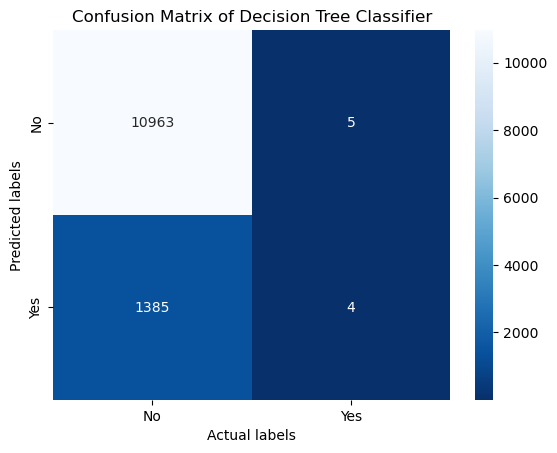

In [35]:
plt9 = plt.subplot()
conf_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=plt9)

plt9.set_xlabel('Actual labels');plt9.set_ylabel('Predicted labels'); 
plt9.set_title('Confusion Matrix of Decision Tree Classifier'); 
plt9.xaxis.set_ticklabels(['No', 'Yes']); 
plt9.yaxis.set_ticklabels(['No', 'Yes']);

plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [36]:
lgr_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

In [37]:
%%time
lgr = lgr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
lgr_pred = lgr.predict(X_test)

CPU times: total: 109 ms
Wall time: 119 ms


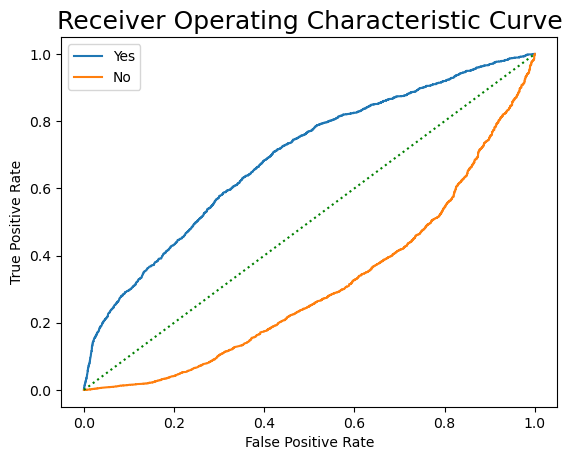

In [38]:
y_pred_prob = lgr.predict_proba(X_test)
yes_prob = y_pred_prob[::,1]

fpr, tpr, threshold = metrics.roc_curve(y_true=y_test,  y_score=yes_prob, pos_label='yes')
fpr1, tpr1, threshold1 = metrics.roc_curve(y_true=y_test,  y_score=yes_prob, pos_label='no')

plt.plot(fpr,tpr, label="Yes")
plt.plot(fpr1,tpr1, label="No")
plt.legend(loc="upper left")
plt.title('Receiver Operating Characteristic Curve', size=18)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
auc = roc_auc_score(y_true=y_test, y_score=yes_prob)
print("Area under curve is {:.6f}".format(round(auc, 2)))

Area under curve is 0.690000


### Problem 9: Score the Model

What is the accuracy of your model?

In [40]:
lgr_acc = accuracy_score(y_test, lgr_pred)
lgr_prec = precision_score(y_test, lgr_pred, average='macro')
lgr_rec = recall_score(y_test, lgr_pred, average='macro')
lgr_f1 = f1_score(y_test, lgr_pred, average='macro')

print("Accuracy: {:.6f}".format(lgr_acc))
print("Precision: {:.6f}".format(lgr_prec))
print("Recall: {:.6f}".format(lgr_rec))
print("F1-score: {:.6f}".format(lgr_f1))

Accuracy: 0.886542
Precision: 0.666559
Recall: 0.515127
F1-score: 0.503089


In [43]:
%%time
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)
print(lgr_train_score)
print(lgr_test_score)

0.8877597030973605
0.8865420409484502
CPU times: total: 93.8 ms
Wall time: 96.7 ms


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [44]:
%%time

knn_pipe = Pipeline([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])
knn = knn_pipe.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

CPU times: total: 10.6 s
Wall time: 10.6 s


In [46]:
%%time
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

print("Training Accuracy Score", knn_train_score)
print("Test Accuracy Score", knn_test_score)

Training Accuracy Score 0.8924074780618084
Test Accuracy Score 0.8781257586792911
CPU times: total: 32.2 s
Wall time: 32.3 s


In [47]:
%%time

dtc_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier())
])

dtc = dtc_pipe.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

CPU times: total: 562 ms
Wall time: 585 ms


In [49]:
%%time
dtc_train_score = dtc.score(X_train, y_train)
dtc_test_score = dtc.score(X_test, y_test)

print("Training Accuracy Score", dtc_train_score)
print("Test Accuracy Score", dtc_test_score)

Training Accuracy Score 0.9256356005688322
Test Accuracy Score 0.8608076393946751
CPU times: total: 93.8 ms
Wall time: 103 ms


In [50]:
%%time
svm_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

svm = svm_pipe.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

CPU times: total: 34.7 s
Wall time: 34.7 s


In [52]:
%%time
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)

print("Training Accuracy Score", svm_train_score)
print("Test Accuracy Score", svm_test_score)

Training Accuracy Score 0.890395754569734
Test Accuracy Score 0.8862992635753014
CPU times: total: 13.2 s
Wall time: 13.2 s


In [53]:
pd.DataFrame({'Model': ['Logistic', 'KNN','Decision Tree', 'SVM'], 
             'Train Time (s)': ['0.109', '10.6', '0.562','34.7'],
             'Train Accuracy': ['0.8877597030973605', '0.8924074780618084', '0.9256356005688322','0.890395754569734'],
             'Test Accuracy': ['0.8865420409484502', '0.8781257586792911', '0.8608076393946751','0.8862992635753014']})

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic,0.109,0.8877597030973605,0.8865420409484502
1,KNN,10.6,0.8924074780618084,0.8781257586792911
2,Decision Tree,0.562,0.9256356005688322,0.8608076393946751
3,SVM,34.7,0.890395754569734,0.8862992635753014


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions